In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

german = pd.read_table("german.data", delimiter=' ', header=None)
german.columns = ['Status_Account', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount',
                     'Saving_Account', 'Present', 'Installment', 'Personal_Status', 'Other', 
                         'Residence', 'Property', 'Age', 'Other_Installment', 'Housing', 'Existing_Credits',
                             'Job', 'Liable_People', 'Tel', 'Foreign_Worker', 'Actual_Score']
target = german.iloc[:,-1]   # Enregistrer la varialbe target
#german = german.iloc[:,0:-1]; # Enleveer la colonne target
german = german.drop(columns="Tel") # Enlever la colonne tel

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [3]:
german.head()

,Status_Account,Duration,Credit_History,Purpose,Credit_Amount,Saving_Account,Present,Installment,Personal_Status,Other,Residence,Property,Age,Other_Installment,Housing,Existing_Credits,Job,Liable_People,Foreign_Worker,Actual_Score
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A201,2


In [12]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def printBarPlot(column):
    trace0 = go.Bar(
        x = german[(german["Actual_Score"]== 1)][column].value_counts().index.values,
        y = german[(german["Actual_Score"]== 1)][column].value_counts().values,
        name= column+' with Good credit'
    )

    #Second plot
    trace1 = go.Bar(
        x = german[(german["Actual_Score"]== 2)][column].value_counts().index.values,
        y = german[(german["Actual_Score"]== 2)][column].value_counts().values,
        name= column+" with Bad Credit"
    )

    data = [trace0, trace1]

    layout = go.Layout(
        title= column+' Distribuition'
    )


    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename=column)

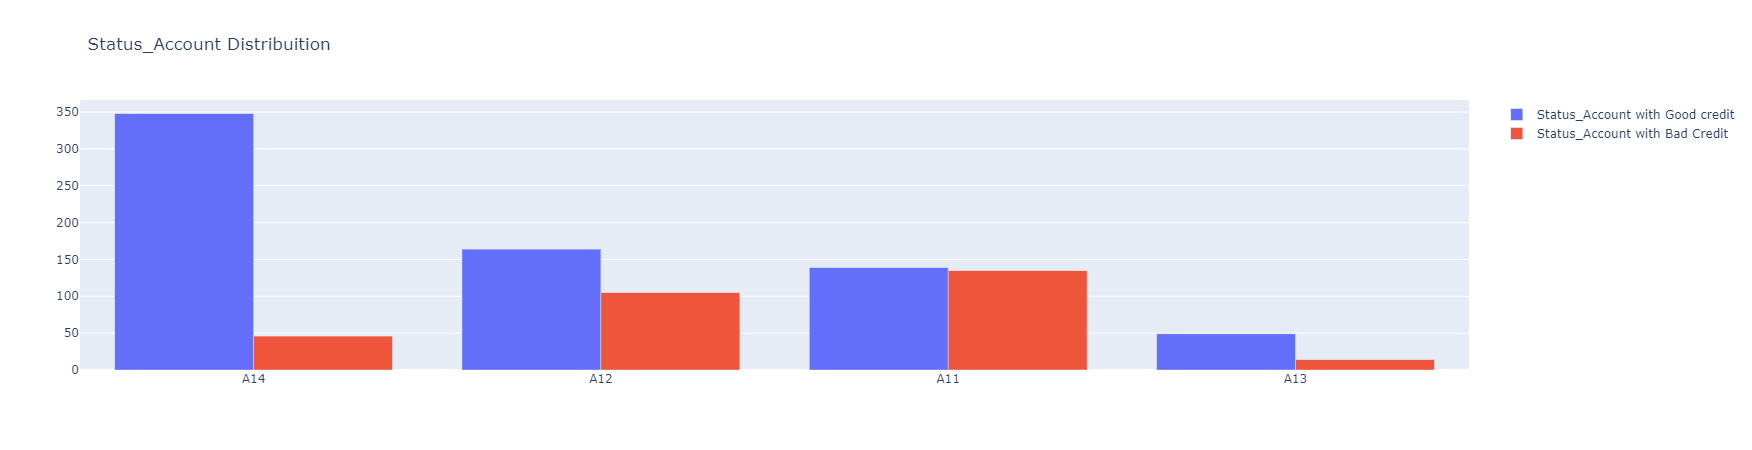

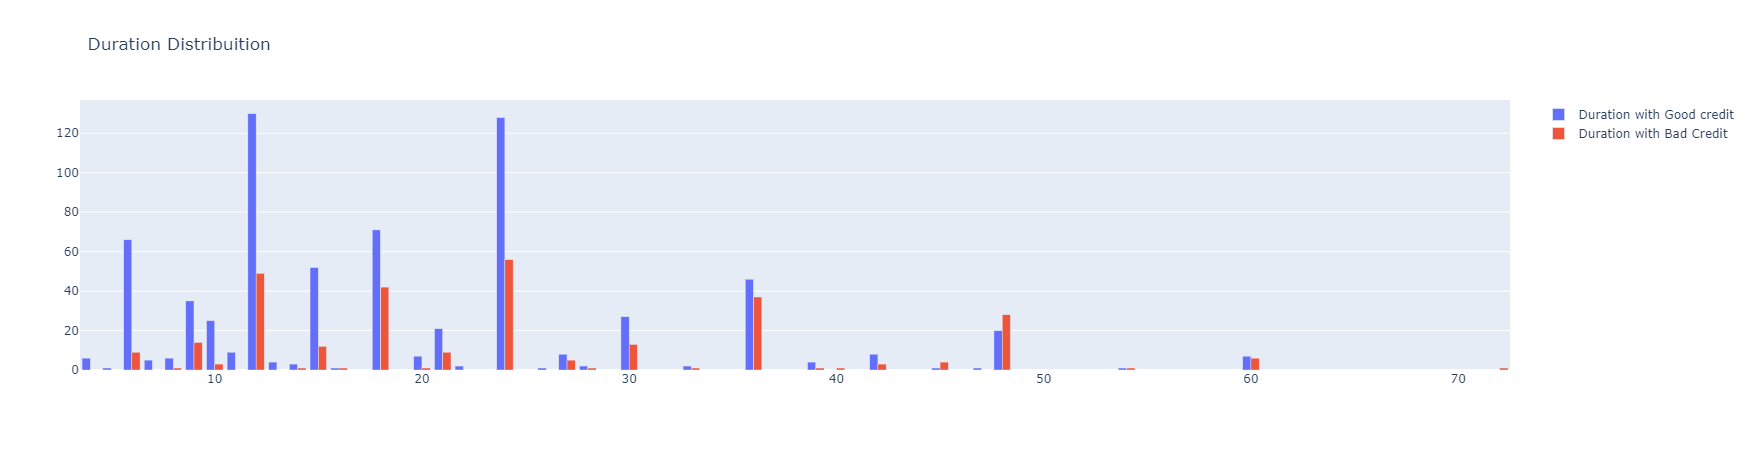

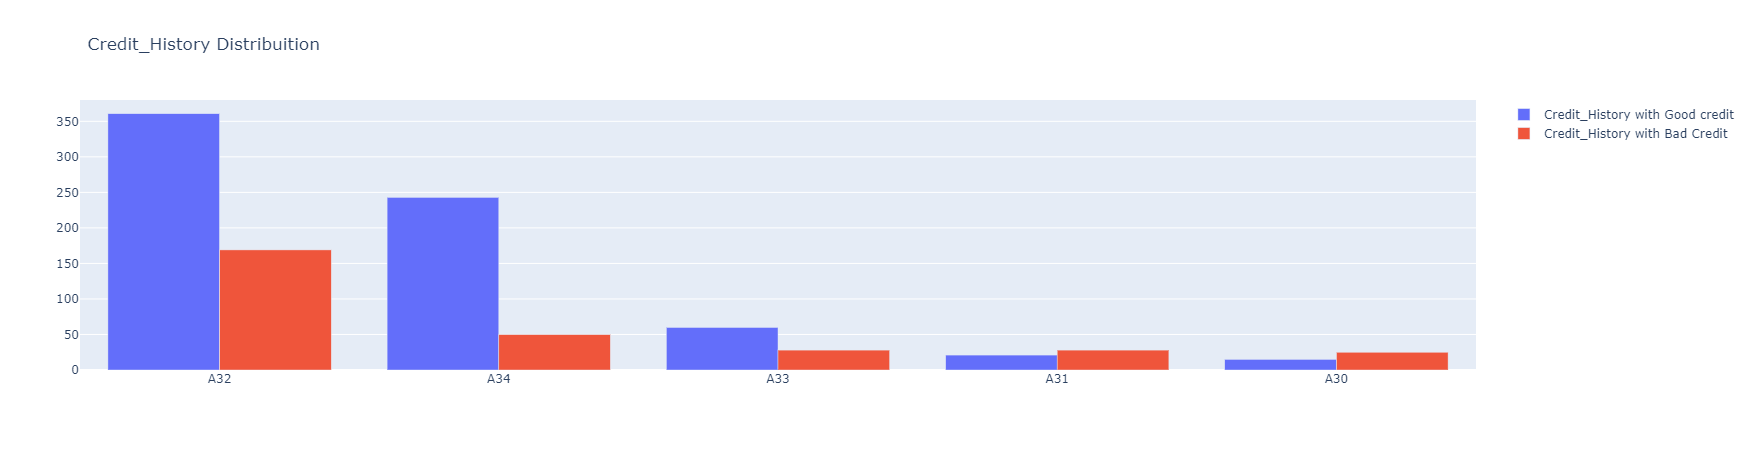

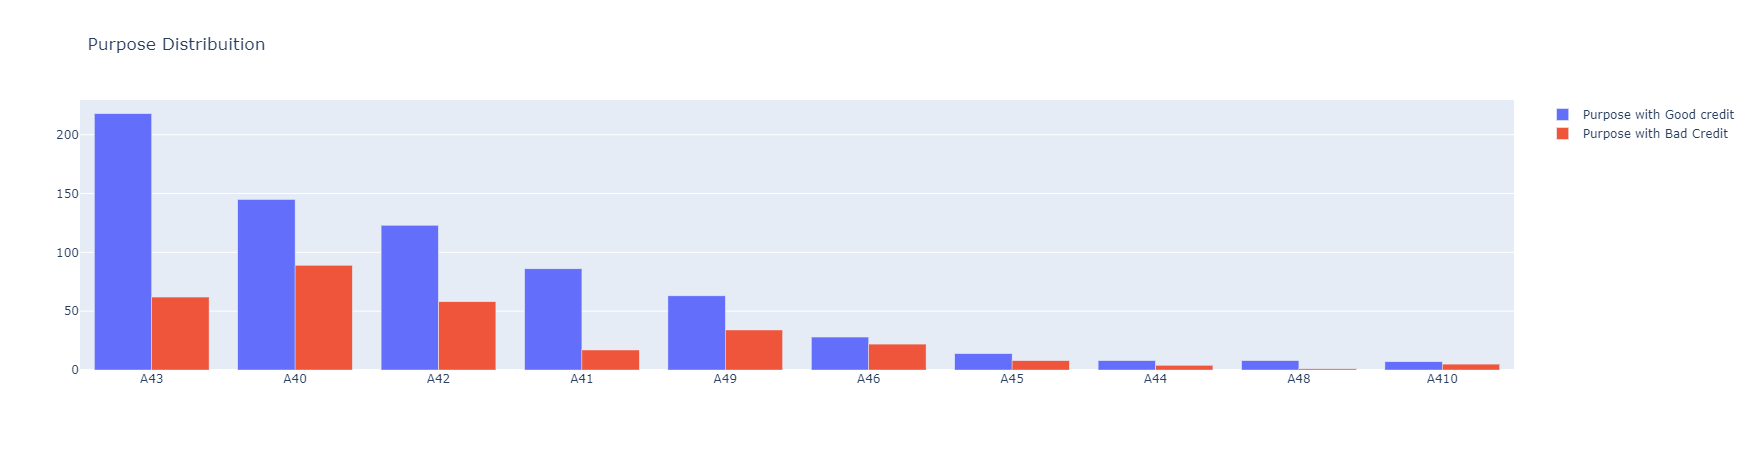

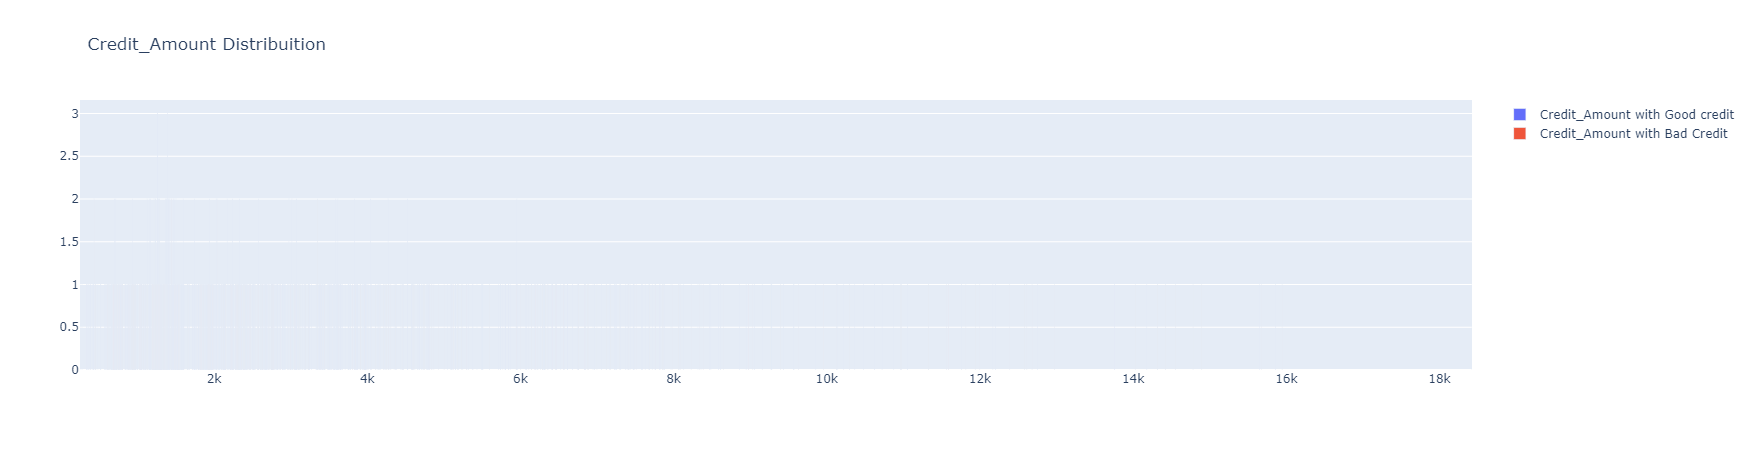

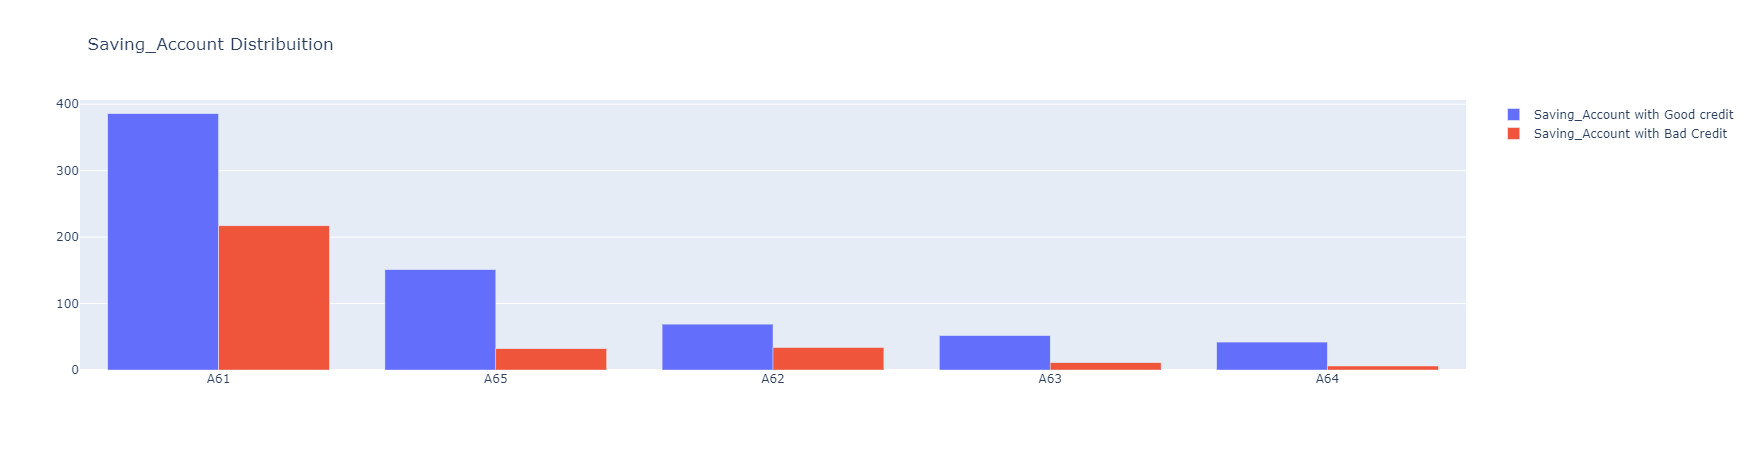

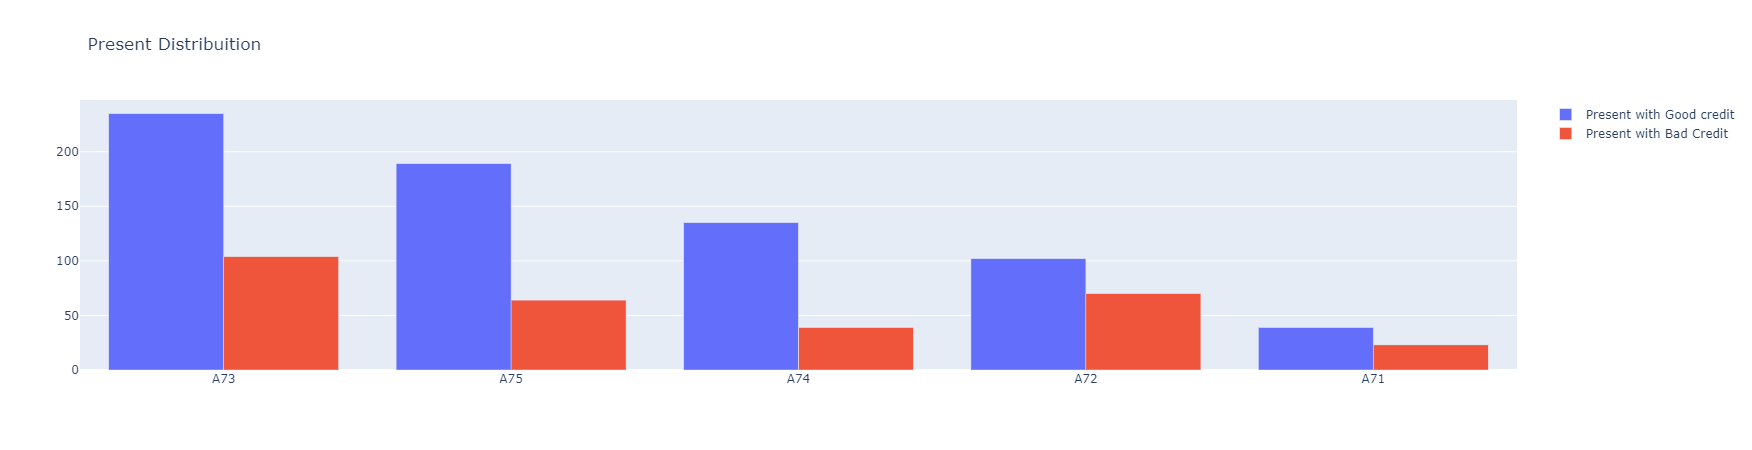

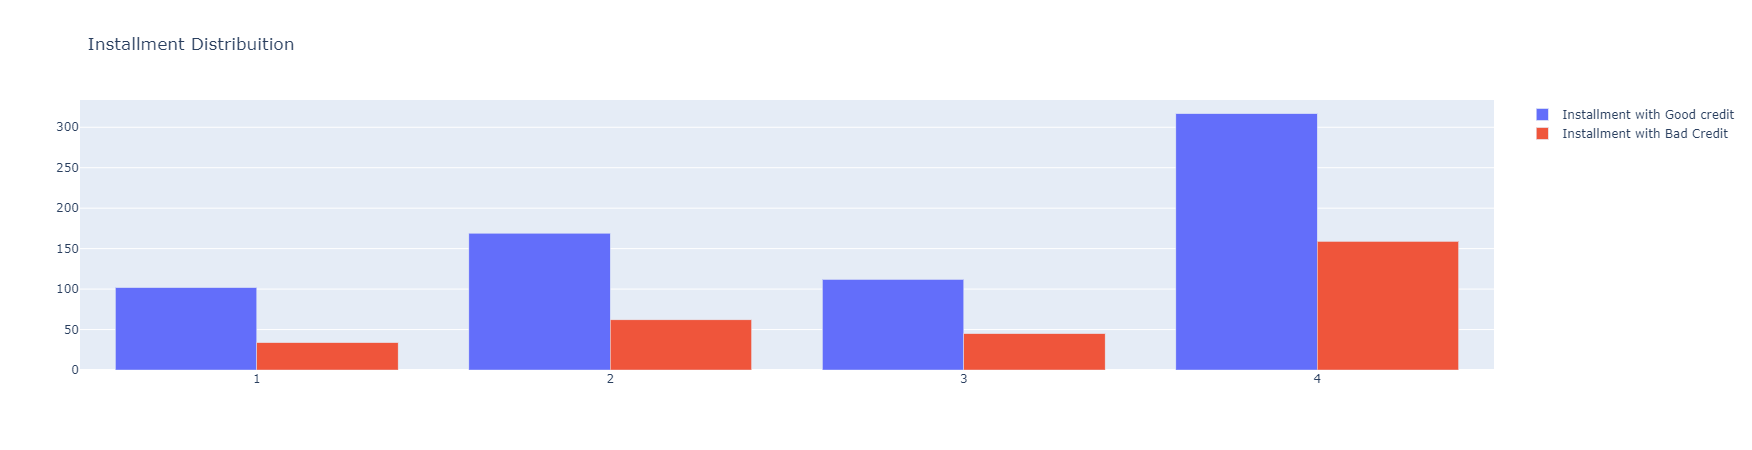

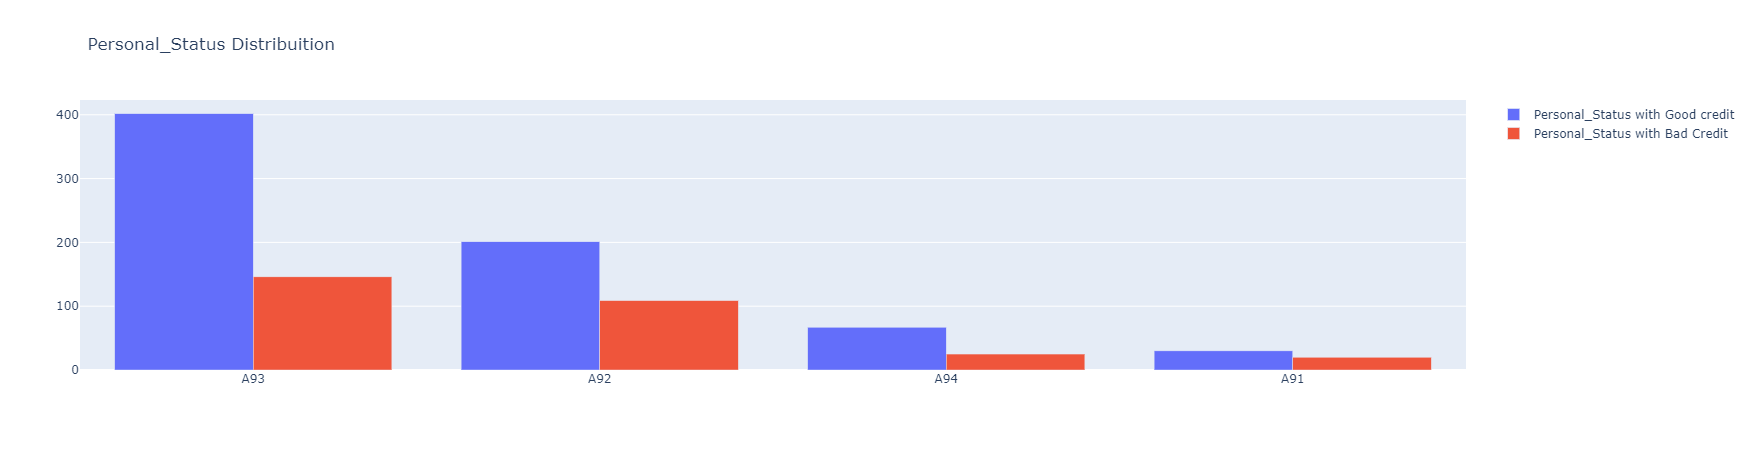

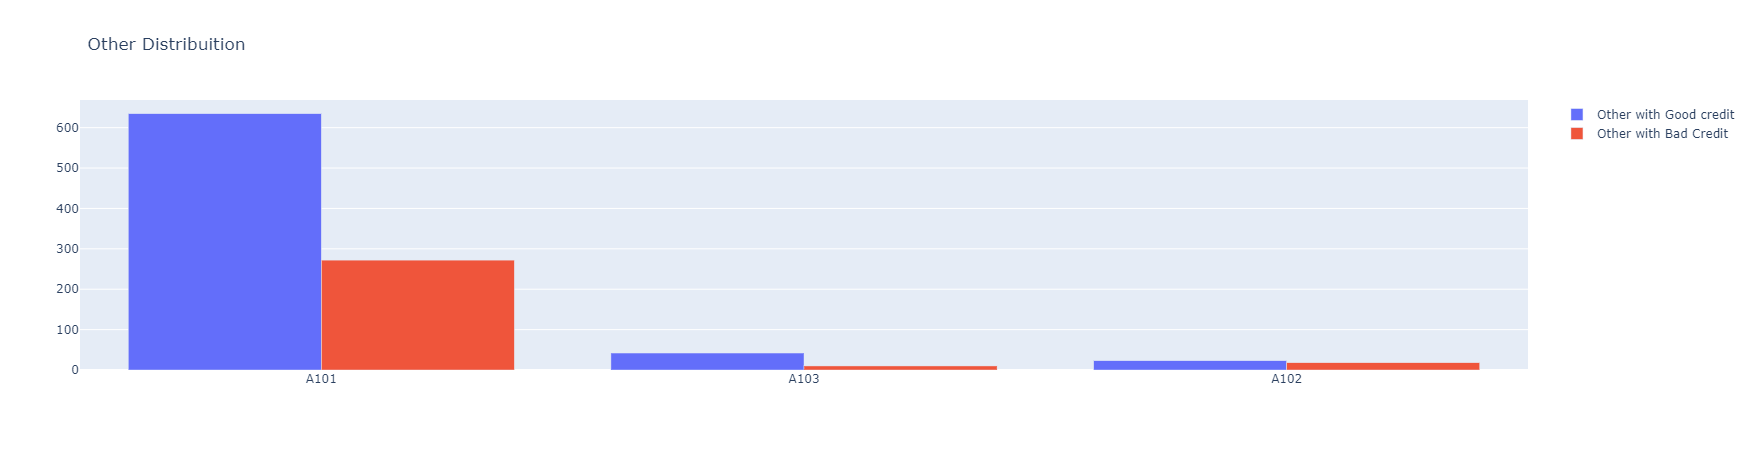

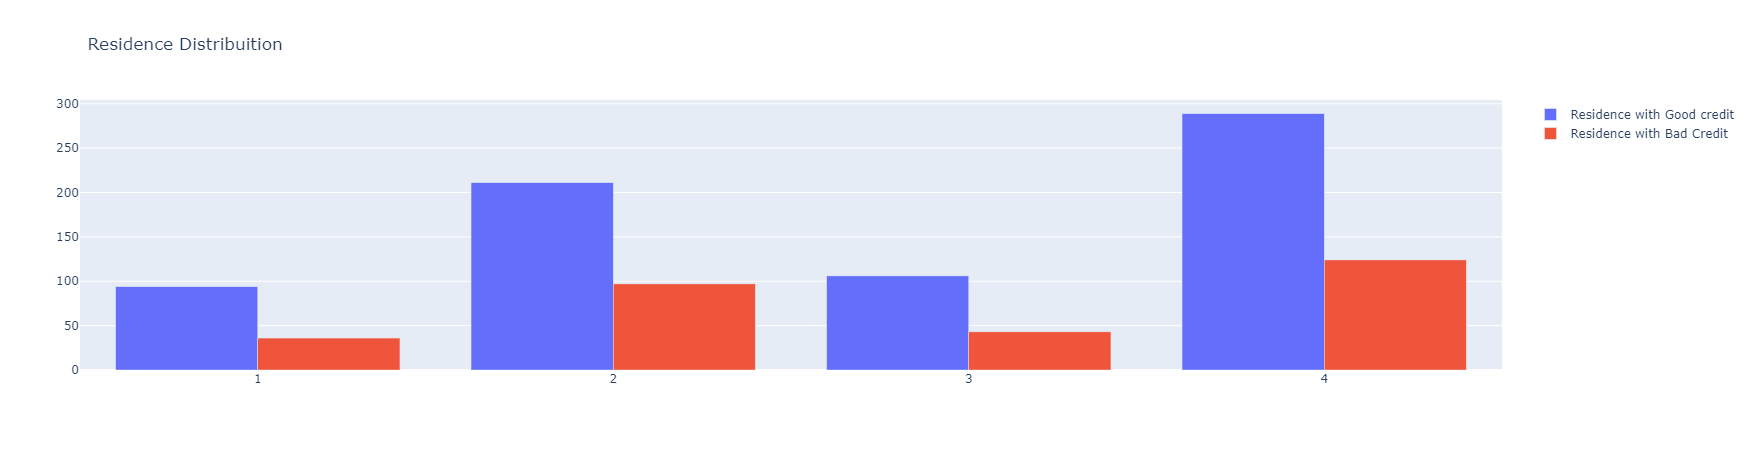

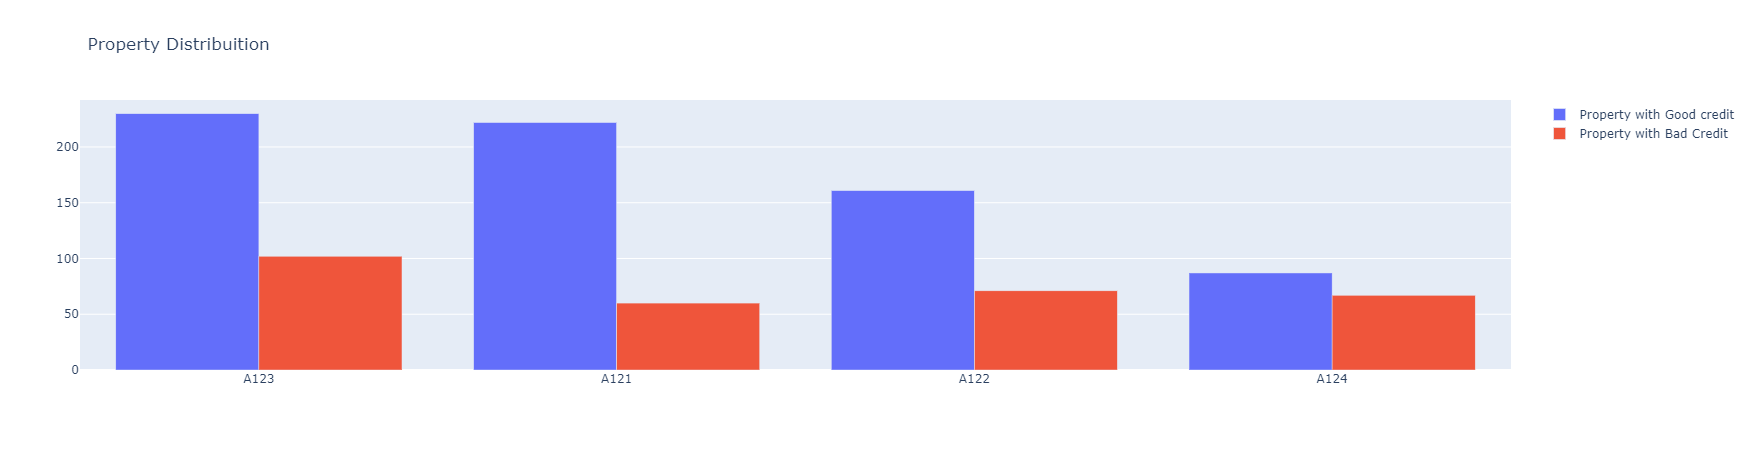

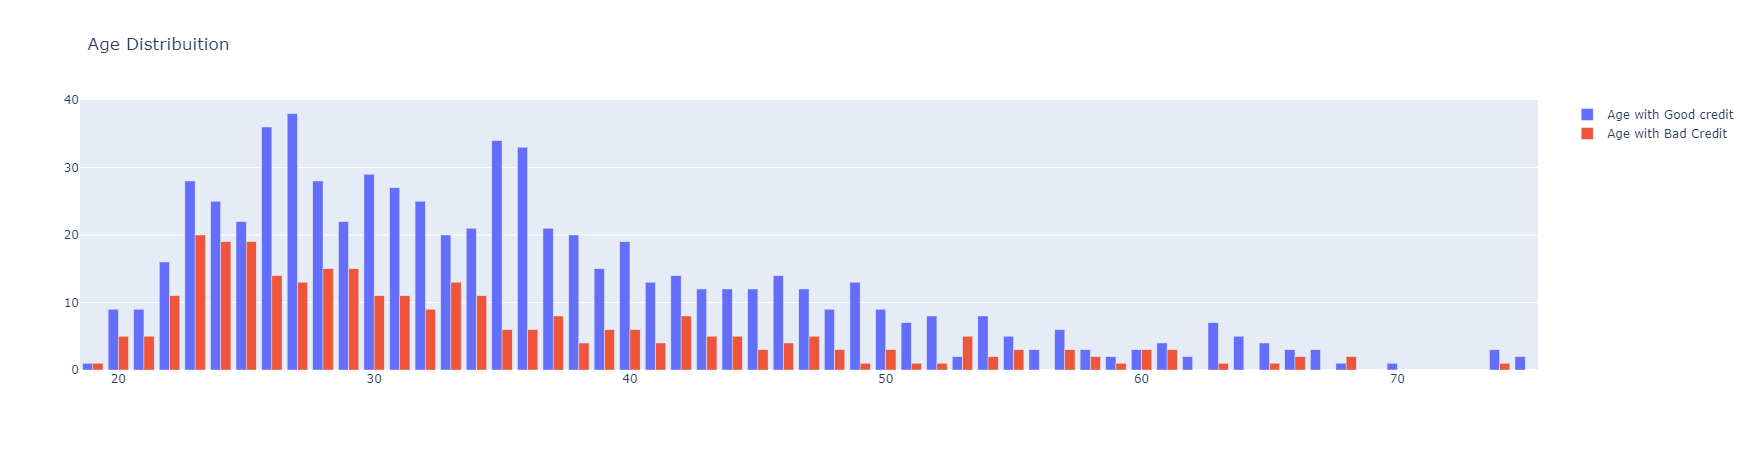

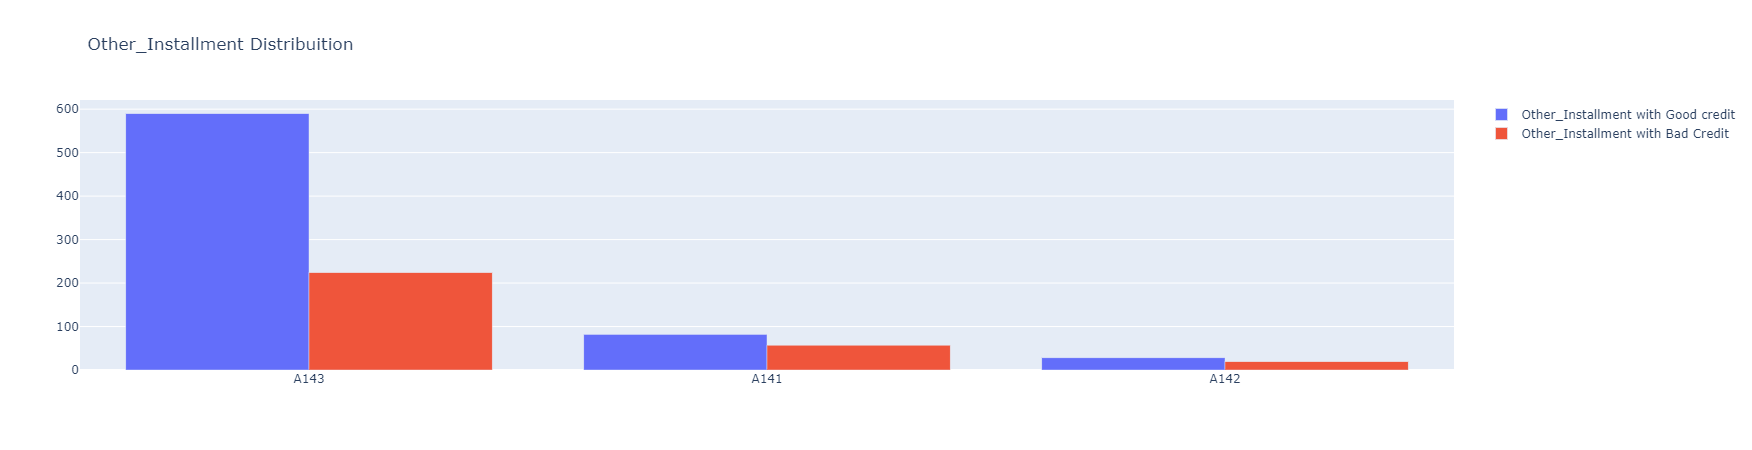

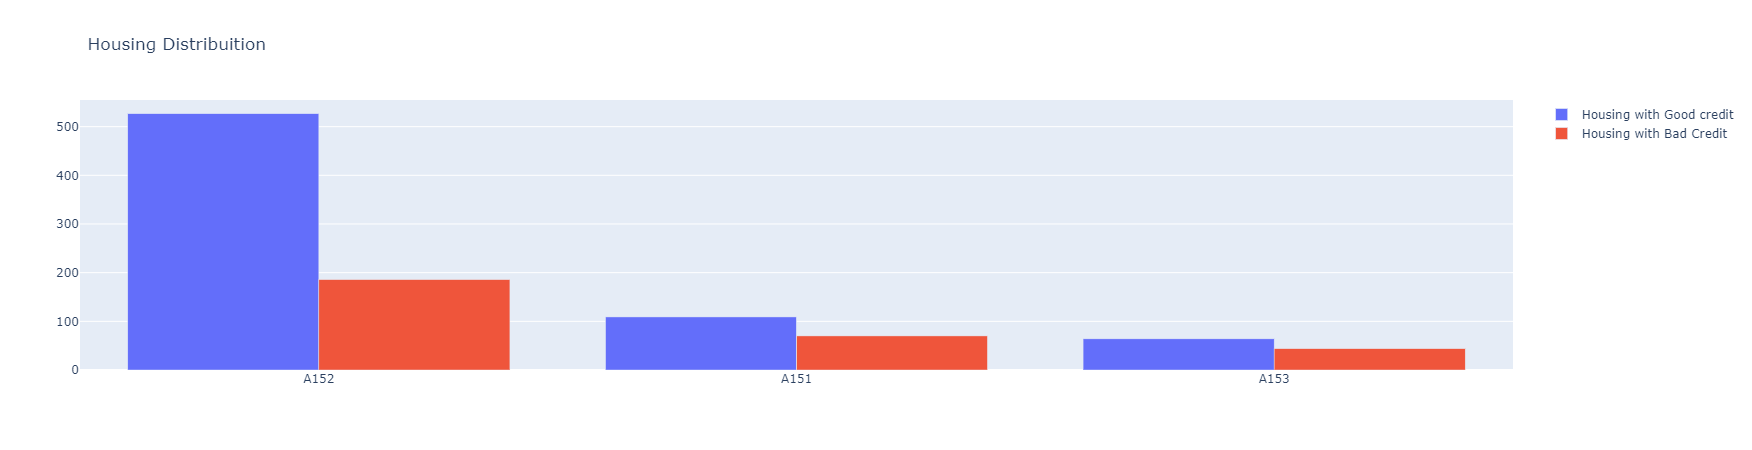

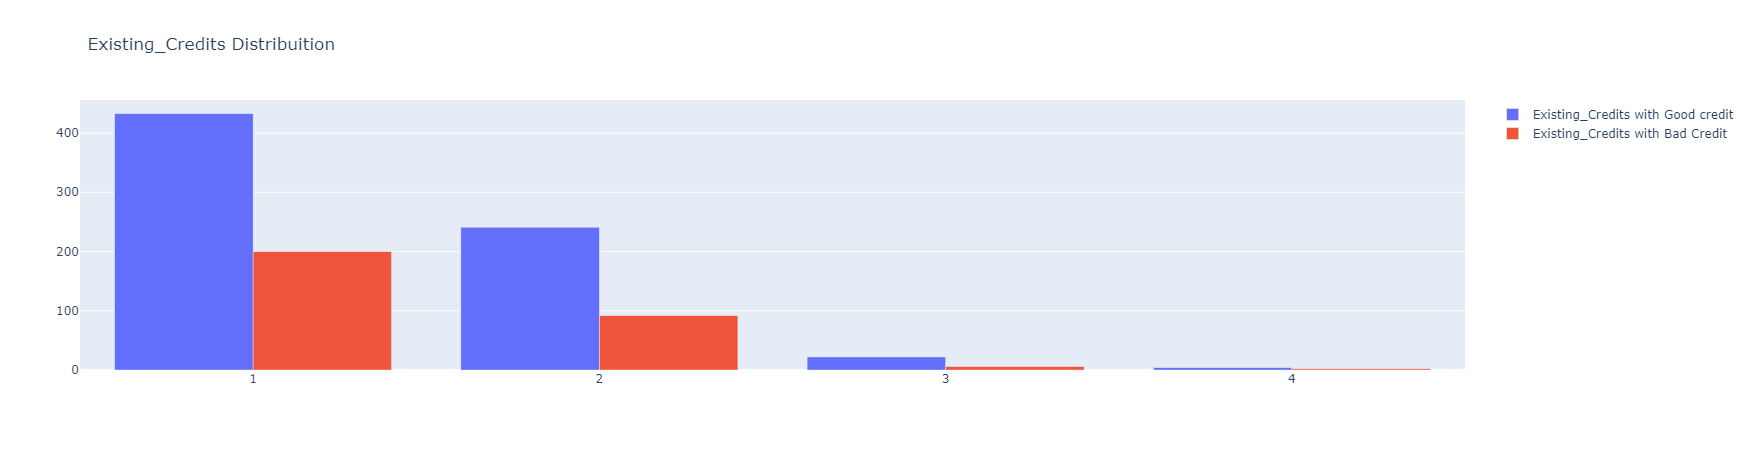

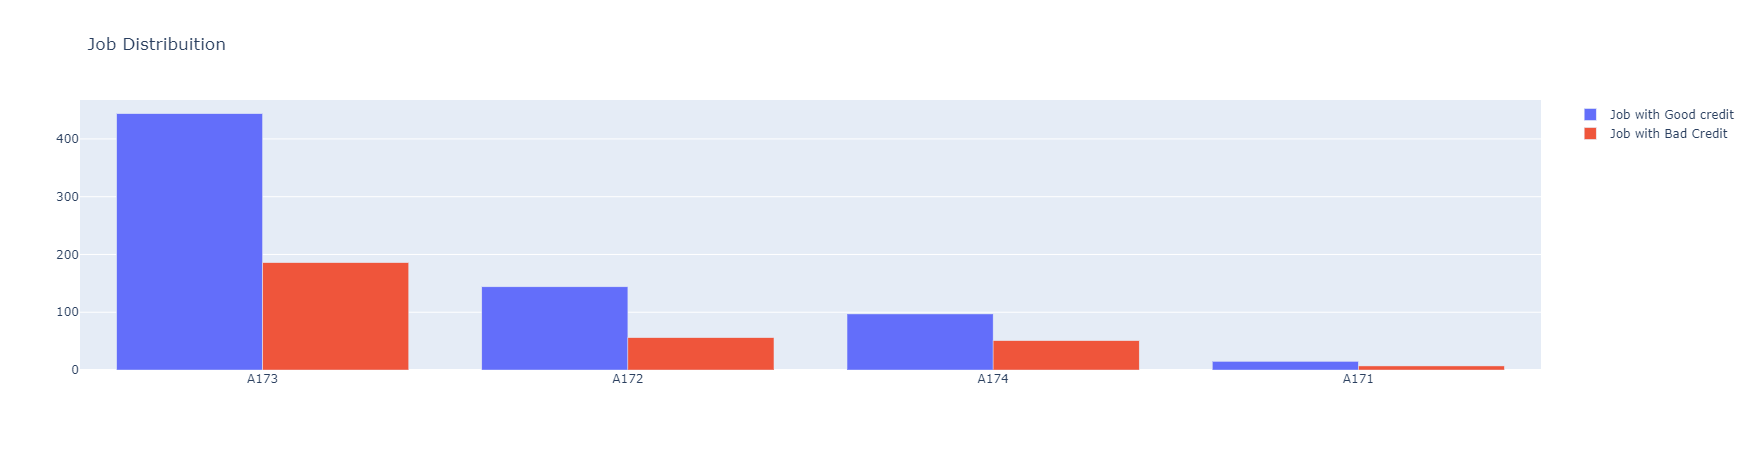

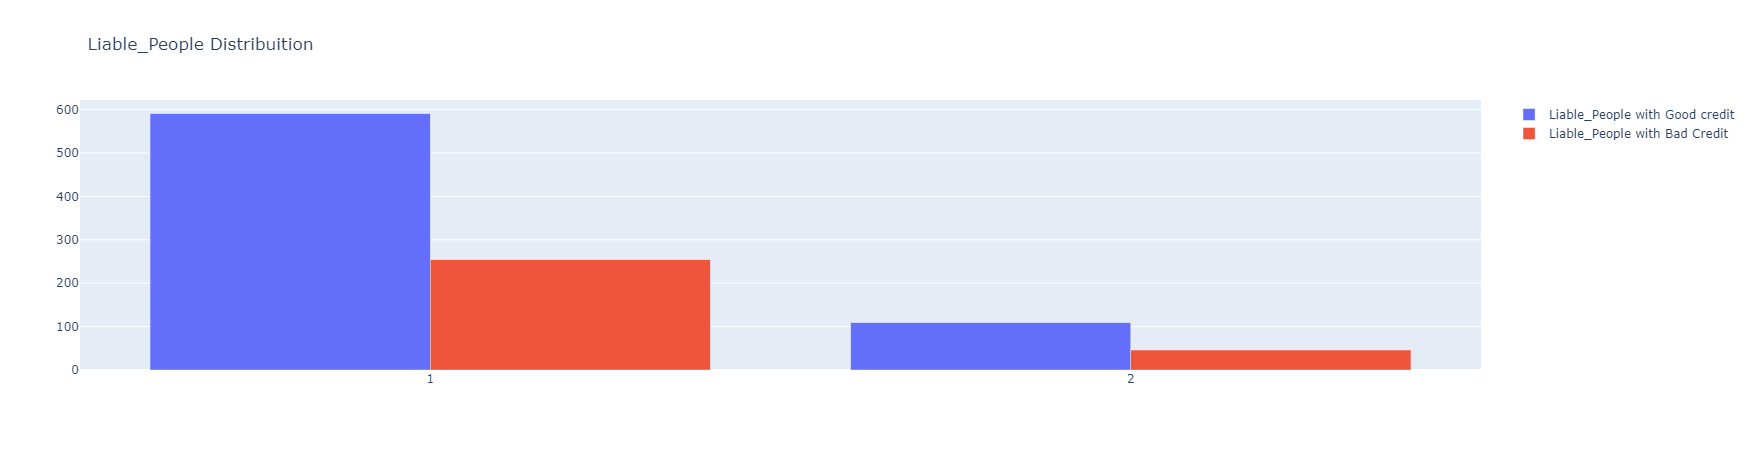

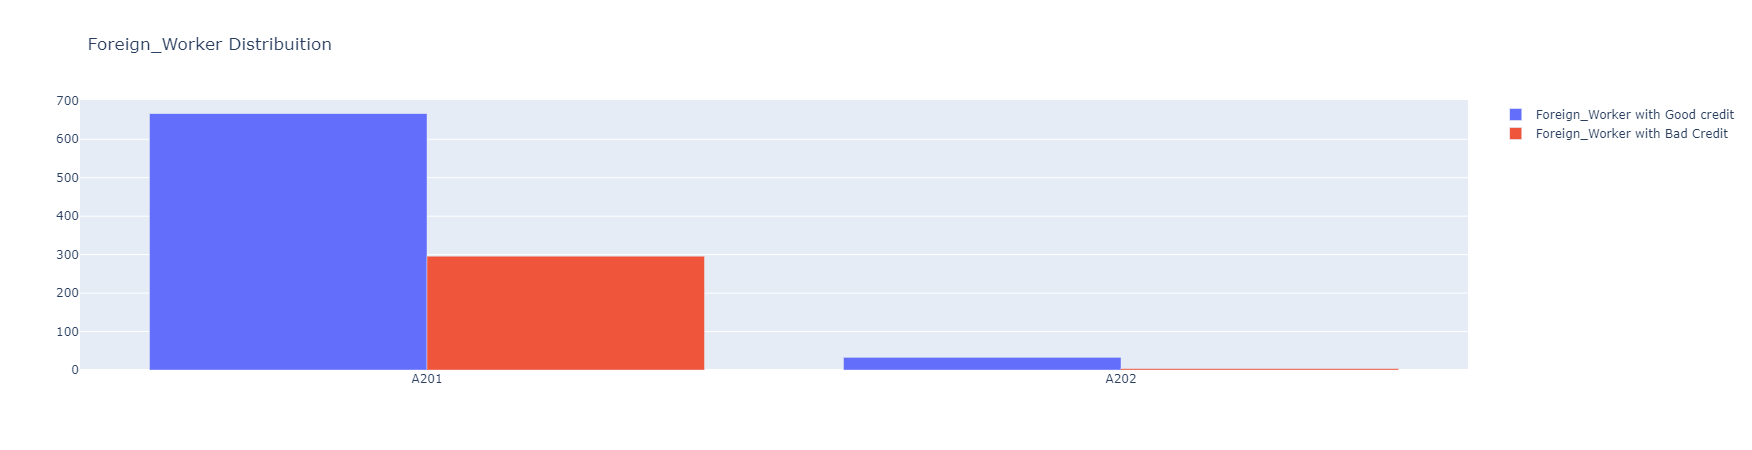

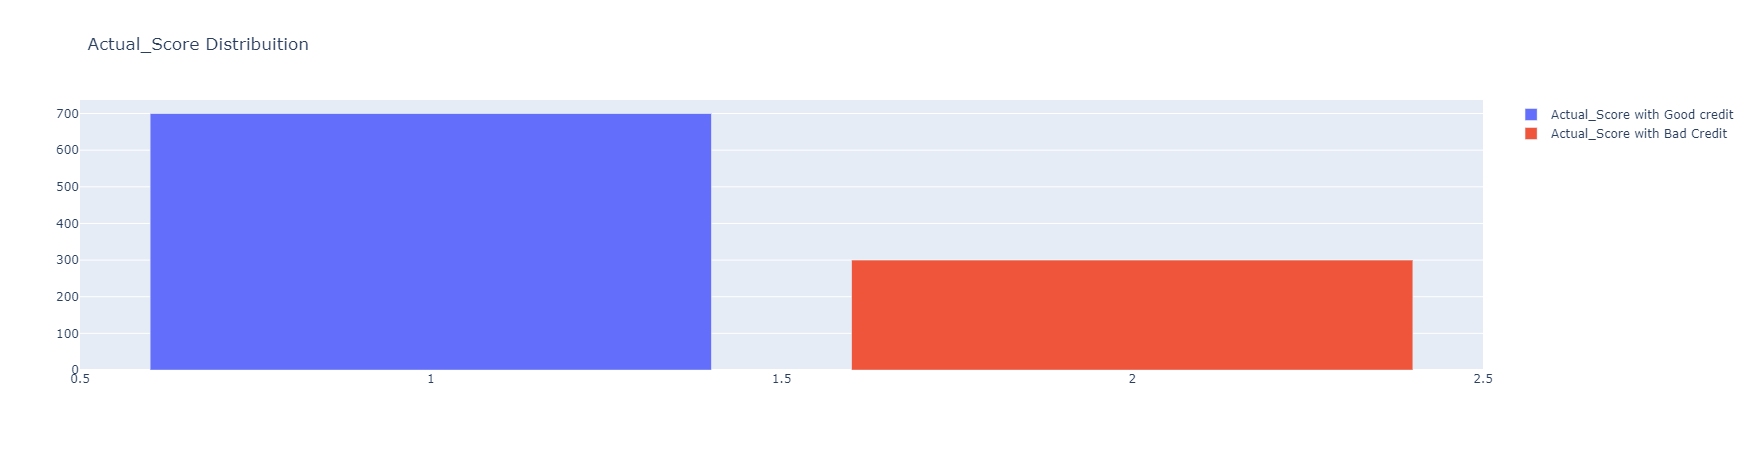

In [62]:
for c in german.columns:
    printBarPlot(c)

In [8]:
#print("Missing values in each column:\n{}".format(german.isnull().sum()))

In [10]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
Status_Account       1000 non-null object
Duration             1000 non-null int64
Credit_History       1000 non-null object
Purpose              1000 non-null object
Credit_Amount        1000 non-null int64
Saving_Account       1000 non-null object
Present              1000 non-null object
Installment          1000 non-null int64
Personal_Status      1000 non-null object
Other                1000 non-null object
Residence            1000 non-null int64
Property             1000 non-null object
Age                  1000 non-null int64
Other_Installment    1000 non-null object
Housing              1000 non-null object
Existing_Credits     1000 non-null int64
Job                  1000 non-null object
Liable_People        1000 non-null int64
Foreign_Worker       1000 non-null object
Actual_Score         1000 non-null int64
dtypes: int64(8), object(12)
memory usage: 156.3+ KB


In [15]:
data_num = german._get_numeric_data()

In [20]:
data_num.corr()

,Duration,Credit_Amount,Installment,Residence,Age,Existing_Credits,Liable_People,Actual_Score
Duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
Credit_Amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
Installment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
Residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
Age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
Existing_Credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
Liable_People,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
Actual_Score,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


## Corrélation Duration et Credit_Amount

In [45]:
data_num.head()

,Duration,Credit_Amount,Installment,Residence,Age,Existing_Credits,Liable_People,Actual_Score
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


In [46]:
DurCred = data_num.iloc[:, [0,1]]

In [47]:
sortedDurCre = DurCred.sort_values(by=['Credit_Amount'])

In [38]:
#DurCred.sort_values(by=['Credit_Amount'])

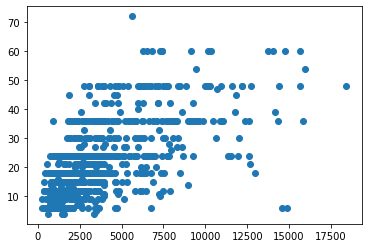

In [49]:
plt.scatter(sortedDurCre["Credit_Amount"], sortedDurCre["Duration"])

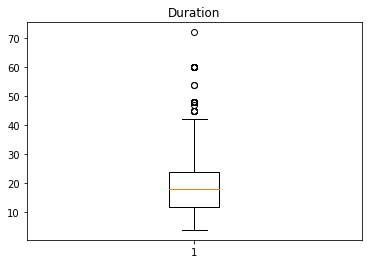

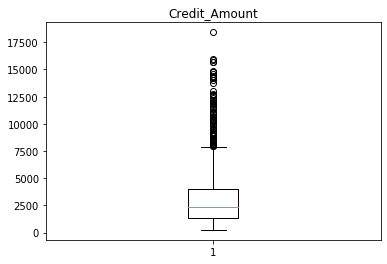

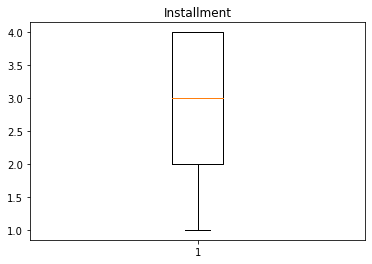

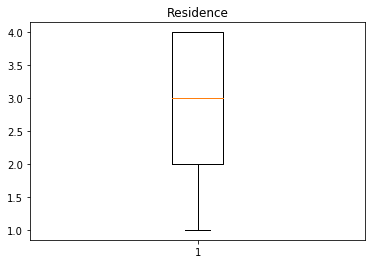

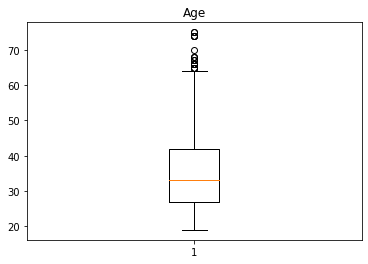

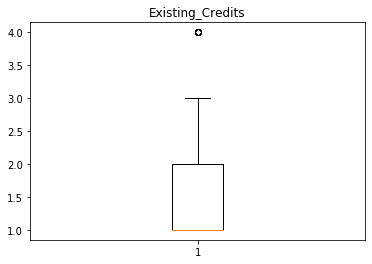

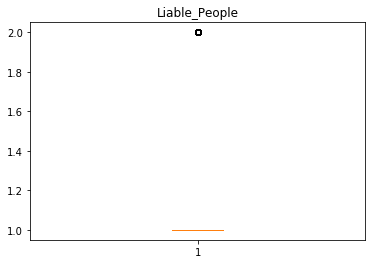

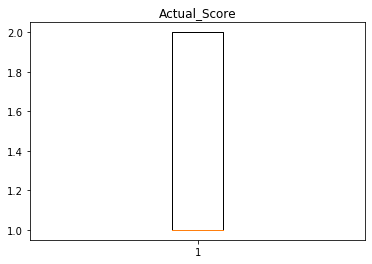

In [61]:
for column in data_num.columns:
    plt.boxplot(data_num[column])
    plt.title(column)
    plt.show()

In [56]:
data_num.columns.shape

(8,)

In [64]:
data_cat = german.select_dtypes(include=['object'])